https://pygam.readthedocs.io/en/latest/notebooks/quick_start.html

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from pygam.datasets import wage

X, y = wage()

In [6]:
X.shape

(3000, 3)

In [7]:
y.shape

(3000,)

In [13]:
# plt.plot(y, X[:, 2])

Now let’s import a GAM that’s made for regression problems.

Let’s fit a spline term to the first 2 features, and a factor term to the 3rd feature.

In [2]:
from pygam import LinearGAM, s, f

gam = LinearGAM(s(0) + s(1) + f(2)).fit(X, y)

In [14]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     25.1911
Link Function:                     IdentityLink Log Likelihood:                                -24118.6847
Number of Samples:                         3000 AIC:                                            48289.7516
                                                AICc:                                           48290.2307
                                                GCV:                                             1255.6902
                                                Scale:                                           1236.7251
                                                Pseudo R-Squared:                                   0.2955
Feature Function                  Lam

/Users/robincole/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


## Partial Dependence Functions
One of the most attractive properties of GAMs is that we can decompose and inspect the contribution of each feature to the overall prediction.

This is done via partial dependence functions.

Let’s plot the partial dependence for each term in our model, along with a 95% confidence interval for the estimated function.

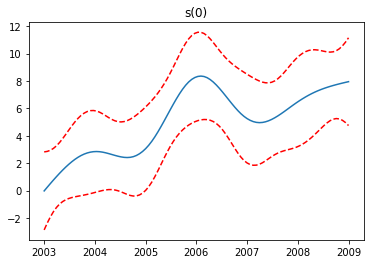

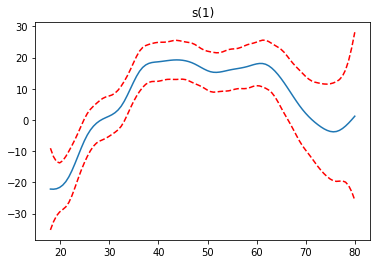

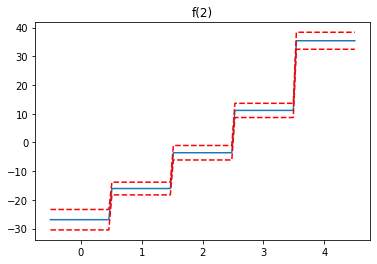

In [15]:
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(repr(term))
    plt.show()